# Regression of nucleation density data

This notebook is a short example on how to use the regression classes available in GlassPy to analyze nucleation density data collected at different times.

This example assumes that GlassPy and all its dependencies are installed in the machine or virtual environment being used.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from glasspy.nucleation.regression import Wakeshima, Kashchiev

## Data

For this simple example, data will be provided as python objects. 

Variable "time" has unit of [second] and variable density has unit of [meter]<sup>-3</sup>.

A pandas DataFrame object is defined at the end. To use the regression classes, we need a DataFrame with at least a "time" and a "density" column. If the "ID" column is provided, then each unique ID is considered separately in the analysis. Any additional columns are stored in the regression Class but are not used during the regression.

In [2]:
time = [52351, 55991, 69294, 86406, 89348, 100359, 110782, 135310, 139662,
        146242, 147392, 147443, 151759, 153989, 161584, 168835, 172506, 176163,
        180516, 183432, 183496, 220938, 230420, 241779, 247205, 260518, 266133,
        268181, 269727, 271700, 284141, 316821, 323361, 341955]

density = [40830000000, 143200000000, 161400000000, 324800000000, 621700000000,
           581000000000, 896500000000, 2158000000000, 1572000000000,
           2693000000000, 2433000000000, 2950000000000, 2987000000000,
           3738000000000, 3234000000000, 3225000000000, 4662000000000,
           3991000000000, 6373000000000, 4154000000000, 4799000000000,
           10780000000000, 11520000000000, 13400000000000, 14750000000000,
           16560000000000, 17840000000000, 18720000000000, 20480000000000,
           18630000000000, 23520000000000, 28900000000000, 31600000000000,
           37260000000000]

data = {'time':time, 'density':density}
data_table = pd.DataFrame(data)

## Regression of the Wakeshima expression

First, we create a regressor object.

In [3]:
regressor = Wakeshima(table=data_table)

We can retrieve the original data from the regressor. Note that, since we did not specify an ID for the dataset, the ID that is returned is False.

In [4]:
gen = regressor.dataGenerator()
ID, time, density, table_slice = next(gen)

print('   The ID is ', ID)
print()
print('   time\tdensity')

for d in zip(time, density):
    print('  ', *d)

   The ID is  False

   time	density
   52351 40830000000
   55991 143200000000
   69294 161400000000
   86406 324800000000
   89348 621700000000
   100359 581000000000
   110782 896500000000
   135310 2158000000000
   139662 1572000000000
   146242 2693000000000
   147392 2433000000000
   147443 2950000000000
   151759 2987000000000
   153989 3738000000000
   161584 3234000000000
   168835 3225000000000
   172506 4662000000000
   176163 3991000000000
   180516 6373000000000
   183432 4154000000000
   183496 4799000000000
   220938 10780000000000
   230420 11520000000000
   241779 13400000000000
   247205 14750000000000
   260518 16560000000000
   266133 17840000000000
   268181 18720000000000
   269727 20480000000000
   271700 18630000000000
   284141 23520000000000
   316821 28900000000000
   323361 31600000000000
   341955 37260000000000


With the regressor object, we can guess the steady-state nucleation rate and the induction time for nucleation.

In [5]:
steady_state_rate_guess, induction_time_guess = regressor.guess(time, density)

print(f'   The guess for the steady-state nucleation rate is {steady_state_rate_guess:.3}, \n   while the guess for the induction time is {induction_time_guess:.3}')

   The guess for the steady-state nucleation rate is 1.15e+08, 
   while the guess for the induction time is 1.39e+05


We can then fit the model to the data and check the adjusted parameters.

In [6]:
gen = regressor.dataGenerator()
ID, time, density, table_slice = next(gen)
fitresult, model = regressor.fit(time, density)

print(fitresult.fit_report())

[[Model]]
    Model(wakeshima)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 34
    # variables        = 2
    chi-square         = 2.7186e+26
    reduced chi-square = 8.4955e+24
    Akaike info crit   = 1953.59248
    Bayesian info crit = 1956.64520
[[Variables]]
    steady_state_rate:   1.2556e+12 +/- 1.4456e+12 (115.13%) == '10**log_rate'
    time_lag:            2.4126e+09 +/- 2.7813e+09 (115.28%) == '10**log_induction_time'
    log_rate:            12.0988561 +/- 0.49999852 (4.13%) (init = 8.060791)
    log_induction_time:  9.38249037 +/- 0.50065891 (5.34%) (init = 5.142793)
    induction_time:      2.4126e+09 +/- 2.7813e+09 (115.28%) == '10**log_induction_time'
[[Correlations]] (unreported correlations are < 0.100)
    C(log_rate, log_induction_time) =  0.999



Finally, we can build a plot!

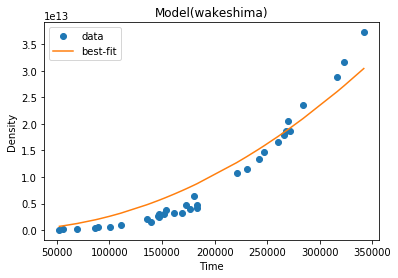

In [7]:
fitresult.plot_fit(ylabel='Density', xlabel='Time')

We can also check the residuals.

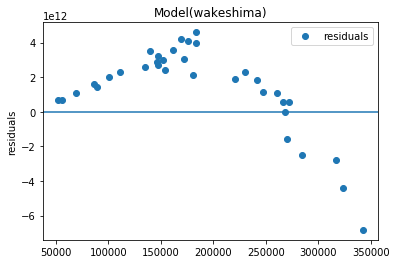

In [8]:
fitresult.plot_residuals()

The Wakeshima model does not seem to be a good model for this dataset. Let's try the Kashchiev equation!

## Regression of the Kashchiev expression

The procedure is similar to that used for the Wakeshima equation. Here we have two additional options
 * How many summation terms to use (summation_ub);
 * If we want to consider the time-shift or not (use_time_shift). 
 Let's try using 100 summation terms and not considering the time-shift first.

In [9]:
regressor = Kashchiev(table=data_table, summation_ub=100, use_time_shift=False)

gen = regressor.dataGenerator()
ID, time, density, table_slice = next(gen)
fitresult, model = regressor.fit(time, density)

print(fitresult.fit_report())

[[Model]]
    Model(kashchiev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 34
    # variables        = 2
    chi-square         = 1.5476e+25
    reduced chi-square = 4.8362e+23
    Akaike info crit   = 1856.14891
    Bayesian info crit = 1859.20163
[[Variables]]
    steady_state_rate:  3.9756e+08 +/- 20785480.7 (5.23%) == '10**log_rate'
    time_lag:           190851.780 +/- 5523.76162 (2.89%) == '10**log_time_lag'
    summation_ub:       100 (fixed)
    time_shift:         0 (fixed)
    log_rate:           8.59939969 +/- 0.02270621 (0.26%) (init = 8.060791)
    log_time_lag:       5.28069622 +/- 0.01256965 (0.24%) (init = 4.926645)
    induction_time:     313938.595 +/- 0.00000000 (0.00%) == 'time_lag*pi**2/6 + time_shift'
[[Correlations]] (unreported correlations are < 0.100)
    C(log_rate, log_time_lag) =  0.986



/data/Science/Venv/py1/lib/python3.7/site-packages/lmfit/model.py:595: UserWarning: unknown parameter hint 'brute_step' for param 'log_rate'
  warnings.warn(self._invalid_hint % (key, name))
/data/Science/Venv/py1/lib/python3.7/site-packages/lmfit/model.py:595: UserWarning: unknown parameter hint 'brute_step' for param 'log_time_lag'
  warnings.warn(self._invalid_hint % (key, name))


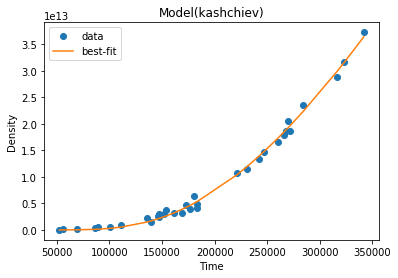

In [10]:
fitresult.plot_fit(ylabel='Density', xlabel='Time')

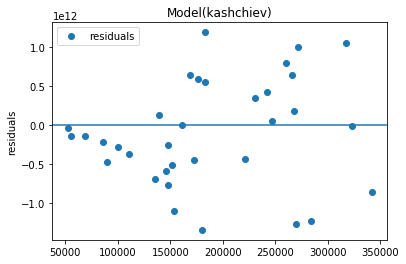

In [11]:
fitresult.plot_residuals()

Much better than our first result!!! Now let's try and check what happens if we increase the number of summation terms.

In [12]:
regressor = Kashchiev(table=data_table, summation_ub=10000, use_time_shift=False)

gen = regressor.dataGenerator()
ID, time, density, table_slice = next(gen)
fitresult, model = regressor.fit(time, density)

print(fitresult.fit_report())

[[Model]]
    Model(kashchiev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 34
    # variables        = 2
    chi-square         = 1.5476e+25
    reduced chi-square = 4.8362e+23
    Akaike info crit   = 1856.14891
    Bayesian info crit = 1859.20163
[[Variables]]
    steady_state_rate:  3.9756e+08 +/- 20785480.7 (5.23%) == '10**log_rate'
    time_lag:           190851.780 +/- 5523.76162 (2.89%) == '10**log_time_lag'
    summation_ub:       10000 (fixed)
    time_shift:         0 (fixed)
    log_rate:           8.59939969 +/- 0.02270621 (0.26%) (init = 8.060791)
    log_time_lag:       5.28069622 +/- 0.01256965 (0.24%) (init = 4.926645)
    induction_time:     313938.595 +/- 0.00000000 (0.00%) == 'time_lag*pi**2/6 + time_shift'
[[Correlations]] (unreported correlations are < 0.100)
    C(log_rate, log_time_lag) =  0.986



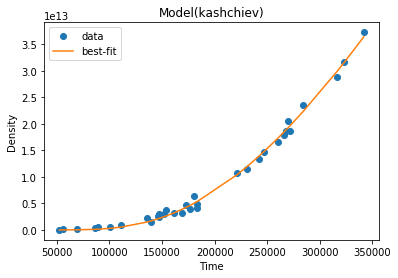

In [13]:
fitresult.plot_fit(ylabel='Density', xlabel='Time')

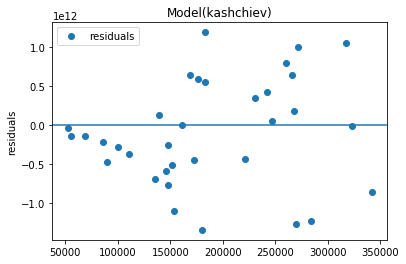

In [14]:
fitresult.plot_residuals()

As expected, 100 summation terms are enough. Now let's consider the time-shift and see what happens.

In [15]:
regressor = Kashchiev(table=data_table, summation_ub=100, use_time_shift=True)

gen = regressor.dataGenerator()
ID, time, density, table_slice = next(gen)
fitresult, model = regressor.fit(time, density)

print(fitresult.fit_report())

[[Model]]
    Model(kashchiev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 34
    # variables        = 2
    chi-square         = 1.5476e+25
    reduced chi-square = 4.8362e+23
    Akaike info crit   = 1856.14891
    Bayesian info crit = 1859.20163
[[Variables]]
    steady_state_rate:  3.9756e+08 +/- 20785306.6 (5.23%) == '10**log_rate'
    time_lag:           190851.697 +/- 5523.77076 (2.89%) == '10**log_time_lag'
    summation_ub:       100 (fixed)
    time_shift:         0 (fixed)
    log_rate:           8.59939935 +/- 0.02270604 (0.26%) (init = 8.599399)
    log_time_lag:       5.28069603 +/- 0.01256967 (0.24%) (init = 5.280696)
    log_time_shift:    -inf (fixed)
    induction_time:     313938.458 +/- 0.00000000 (0.00%) == 'time_lag*pi**2/6 + time_shift'
[[Correlations]] (unreported correlations are < 0.100)
    C(log_rate, log_time_lag) =  0.986



/data/Science/Venv/py1/lib/python3.7/site-packages/lmfit/model.py:595: UserWarning: unknown parameter hint 'brute_step' for param 'log_time_shift'
  warnings.warn(self._invalid_hint % (key, name))


As you can see, the time-shift seems to be still fixed at zero. This happens when the time-shift is too small or if its uncertainty is too high, suggesting that it should not be considered in this regression.